Gamelab data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pickle
from common_functions import get_clean_data
from common_functions import get_player_game_info, get_player_game_data, string_to_list, rational_to_double

# master (1 session), TSE (0-6 sessions), or Mturk (0-4 sessions)
exp = "tse"
ses = "1"
all_choices = get_clean_data(exp,ses,"choice")
all_players = get_clean_data(exp,ses,"player")
all_games = get_clean_data(exp,ses,"game")
all_payoffs = get_clean_data(exp,ses,"payoff")
all_pasts = get_clean_data(exp,ses,"past")
all_gameplays = get_clean_data(exp,ses,"gameplay")
all_games = all_games.sort_values(['id']).reset_index(drop=True)
all_pasts = all_pasts.sort_values(['round','gameid']).reset_index(drop=True)

all_pasts.currentsp1 = all_pasts.currentsp1.apply(string_to_list)
all_pasts.currentsp2 = all_pasts.currentsp2.apply(string_to_list)

lis = [all_payoffs, all_choices, all_players, all_games, all_pasts, all_gameplays]

How does the data look like:

In [2]:
print('Choices:')
print(all_choices.head())
print('***********************************')
print('Players:')
print(all_players.head())
print('***********************************')
print('Games:')
print(all_games.head())
print('***********************************')
print('Payoffs:')
print(all_payoffs.head())
print('***********************************')
print('Pasts:')
print(all_pasts.head())
print('***********************************')
print('Gameplays:')
print(all_gameplays.head())

Choices:
   Unnamed: 0  playerid  round           strats  stratsz  gameid  sessid  \
0           1         5      3            1 0 0        3       4      97   
1           2         5      3  3/10 2/5 0 3/10        4       3      97   
2           3         5     28      9/10 0 1/10        3       4     383   
3           4         5     25      1/2 0 1/2 0        4       1     356   
4           5         5      9          0 0 1 0        4       2     193   

      created    id  globalid  
0  1525313457   163        21  
1  1525313325   161        21  
2  1526033759  1979        21  
3  1525947509  1765        21  
4  1525513374   646        21  
***********************************
Players:
   Unnamed: 0                              email  hitid  assignmentid  \
0           1       a.bienfait@tbs-education.org    NaN           NaN   
1           2  alexandra.verlhiac@ut-capitole.fr    NaN           NaN   
2           3           camille.recher@gmail.com    NaN           NaN   
3    

In [5]:
#First period strats data for simulations and models
#with open(f"data/data_dicts_{exp}{ses}.pkl", 'rb') as input: 
#    df = pickle.load(input)

#df = pd.DataFrame(df)
#df.head()

First we provide plots for the average play

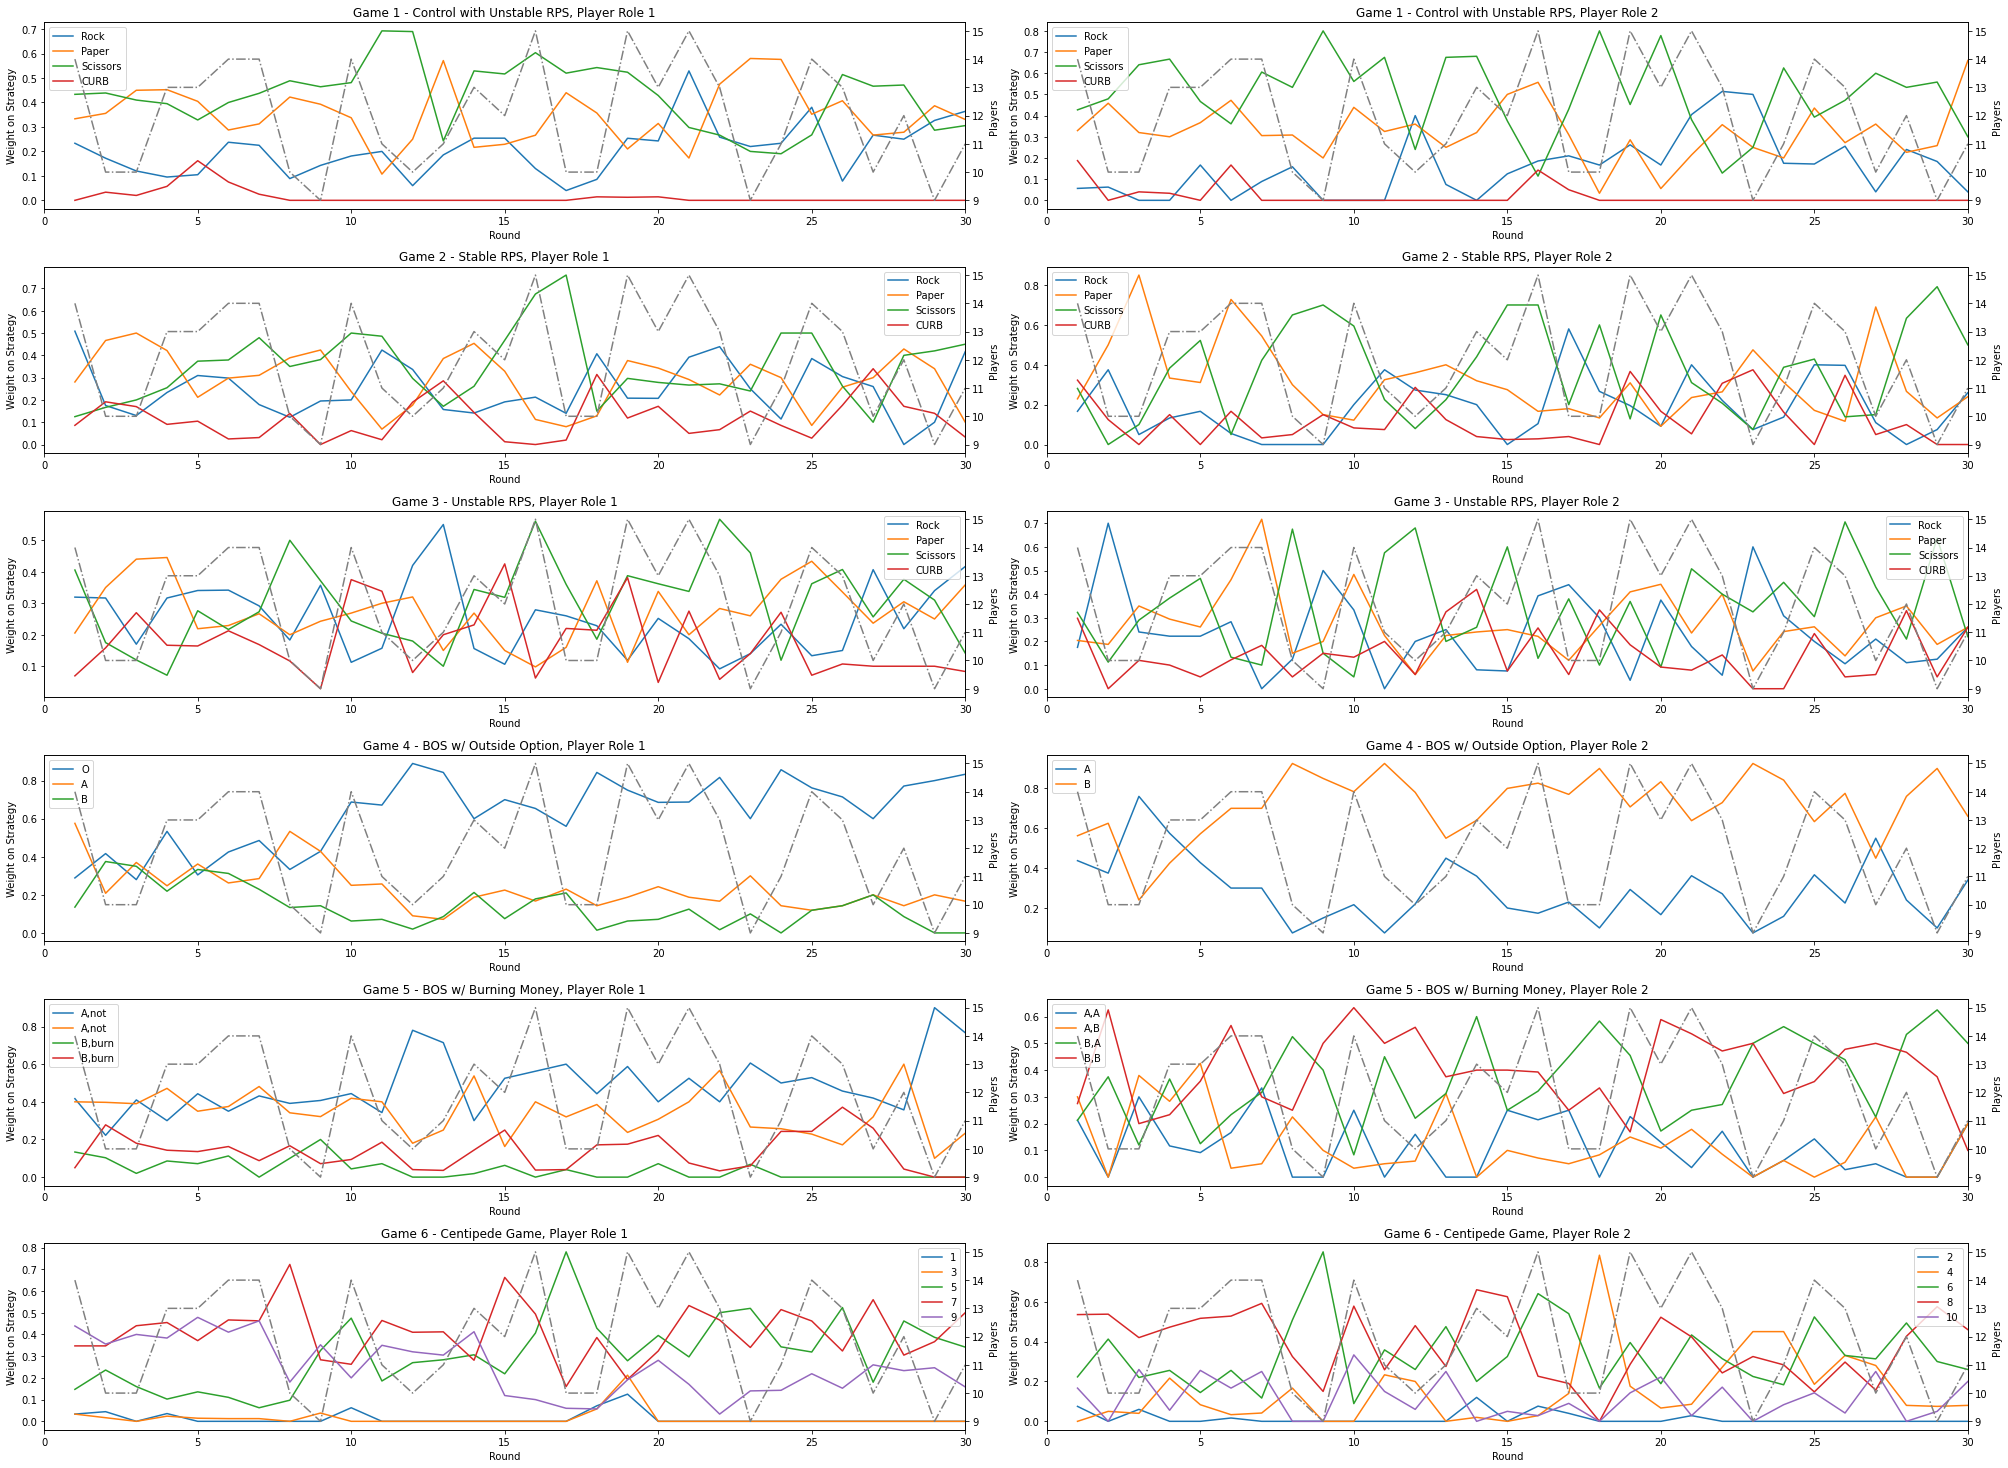

In [7]:
y = np.arange(len(all_choices['round'][all_choices['gameid']==1].unique()))+1
game_names = ['Control with Unstable RPS', 'Stable RPS', 'Unstable RPS', 'BOS w/ Outside Option', 'BOS w/ Burning Money','Centipede Game']
label_g1 = [['Rock','Paper','Scissors','CURB'],['Rock','Paper','Scissors','CURB']]
label_g2 = [['Rock','Paper','Scissors','CURB'],['Rock','Paper','Scissors','CURB']]
label_g3 = [['Rock','Paper','Scissors','CURB'],['Rock','Paper','Scissors','CURB']]
label_g4 = [['O','A','B'],['A','B']]
label_g5 = [['A,not','A,not','B,burn','B,burn'],['A,A','A,B','B,A','B,B']]
label_g6 = [['1','3','5','7','9'],['2','4','6','8','10']]
strat_labels = [label_g1, label_g2, label_g3, label_g4, label_g5,label_g6]
fig, axs = plt.subplots(len(all_games.id), 2)
fig.set_size_inches(28, 20.5)

for gid in all_games.id.unique():
    avg_strats = [list(map(list,zip(*all_pasts.currentsp1[all_pasts['gameid']==gid]))) , list(map(list,zip(*all_pasts.currentsp2[all_pasts['gameid']==gid])))]
    n_players = all_pasts.plays[all_pasts['gameid']==gid].reset_index(drop=True)
    for i in range(0,2):
        for j in range(0,int(all_games[f"p{i+1}"][all_games['id']==gid])):
            axs[gid-1, i].plot(y,avg_strats[i][j], label=strat_labels[gid-1][i][j])
            axs[gid-1, i].set_title(f"Game {gid} - {game_names[gid-1]}, Player Role {i+1}")
        axs[gid-1, i].set_xlabel('Round')
        axs[gid-1, i].set_ylabel('Weight on Strategy')
        axs[gid-1, i].legend()
        axs[gid-1, i].set_xlim([0, 30])
        axst = axs[gid-1, i].twinx()
        axst.plot(y,n_players,linestyle='-.', color='gray')
        axst.set_ylabel('Players')

fig.tight_layout()

Sandbox

In [110]:
avg_strats = [list(map(list,zip(*all_pasts.currentsp1[all_pasts['gameid']==5]))) , list(map(list,zip(*all_pasts.currentsp2[all_pasts['gameid']==5])))]

eq1 = [[0,1,0,0]]
cons = ({'type': 'eq', 'fun': lambda x:  x[0] + x[1] + x[2] + x[3] -1})
bnds = ((0, 1), (0, 1), (0, 1), (0, 1))
func = lambda a,b,c,d,x: (x[0]-a)**2+(x[1]-b)**2+x[2]+x[3]
lfunc = lambda x: minimize(functools.partial(func,x[0],x[1],x[2],x[3]), (1/4,1/4,1/4,1/4), method='SLSQP', bounds=bnds, constraints=cons)
                


eq1 = np.dot(np.array(eq1).T,np.array([np.ones(len(all_choices['round'][all_choices['gameid']==gid].unique()))]))            
dist = np.sqrt(np.sum((eq1-avg_strats[0])**2, axis=0)+np.sum((eq2-avg_strats[1])**2, axis=0)) 
dist

array([0.90622743, 0.77757458, 1.06931637, 0.73337879, 1.22791872,
       1.06814481, 0.89570675, 0.64083496, 1.04073692, 0.68316258,
       0.64870812, 0.95097319, 0.80997599, 0.93407114, 0.84910083,
       0.86617935, 0.86111039, 0.98298016, 1.05663381, 0.93455575,
       0.91676969, 0.92798168, 1.02855886, 0.92781104, 0.99757205,
       1.01346405, 0.98425098, 1.09779324, 1.24834265, 1.03245931])

Now instead, distance to equilibrium

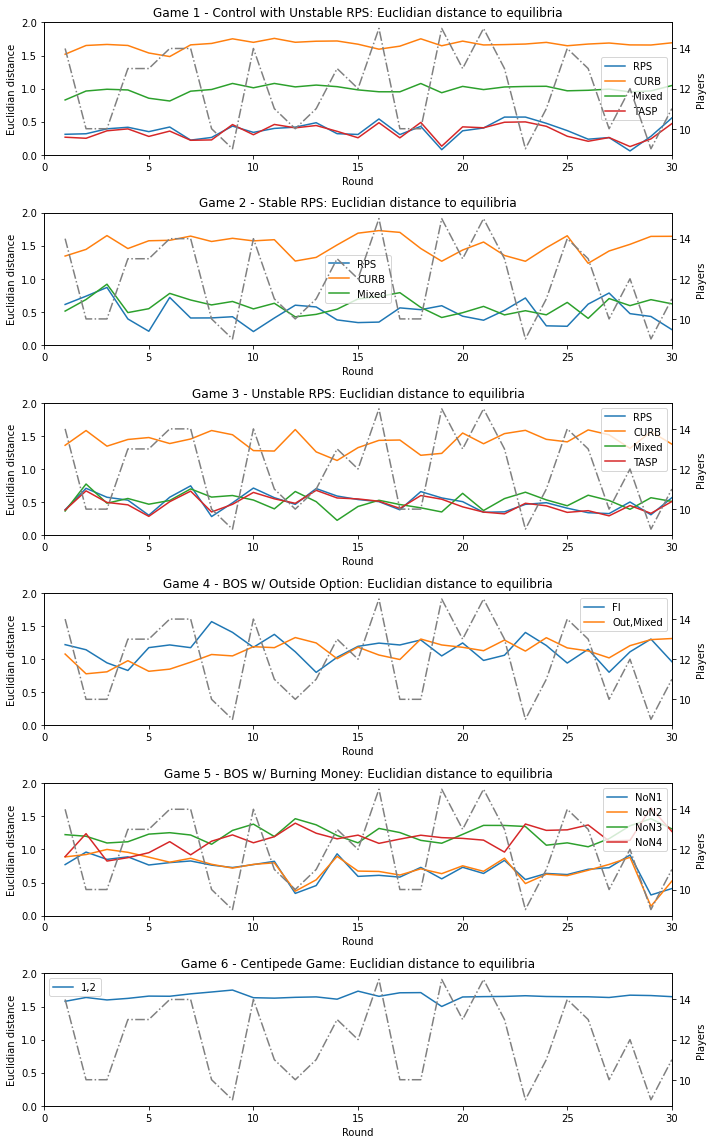

In [4]:
from scipy.optimize import minimize
import functools


eq_game1 = [[[1/4,1/4,1/2,0],[1/4,1/4,1/2,0]],[[0,0,0,1],[0,0,0,1]],[[3/28,3/28,3/14,4/7],[3/28,3/28,3/14,4/7]],[[0.24,0.31,0.45,0],[0.24,0.31,0.45,0]]]
eq_names1 = ['RPS','CURB','Mixed','TASP']
eq_game2 = [[[1/4,1/4,1/2,0],[1/4,1/4,1/2,0]],[[0,0,0,1],[0,0,0,1]],[[3/19,3/19,6/19,7/19],[3/19,3/19,6/19,7/19]]]
eq_names2 = ['RPS','CURB','Mixed']
eq_game3 = [[[1/4,1/4,1/2,0],[1/4,1/4,1/2,0]],[[0,0,0,1],[0,0,0,1]],[[3/19,3/19,6/19,7/19],[3/19,3/19,6/19,7/19]],[[0.24,0.31,0.45,0],[0.24,0.31,0.45,0]]]
eq_names3 = ['RPS','CURB','Mixed','TASP']
eq_game4 = [[[1,0,0],[1,0]],'c1']
eq_names4 = ['FI','Out,Mixed']
eq_game5 = ['cb1','cb2','cb3','cb4']
eq_names5 = ['NoN1','NoN2','NoN3','NoN4']
eq_game6 = [[[1,0,0,0,0],[1,0,0,0,0]]]
eq_names6 = ['1,2']
eq_games = [eq_game1,eq_game2,eq_game3,eq_game4,eq_game5,eq_game6]
eq_names = [eq_names1,eq_names2,eq_names3,eq_names4,eq_names5,eq_names6]


fig, axs = plt.subplots(len(all_games.id), 1)    
fig.set_size_inches(10, 16)

for gid in [1,2,3,4,5,6]:
    avg_strats = [list(map(list,zip(*all_pasts.currentsp1[all_pasts['gameid']==gid]))) , list(map(list,zip(*all_pasts.currentsp2[all_pasts['gameid']==gid])))]
    n_players = all_pasts.plays[all_pasts['gameid']==gid].reset_index(drop=True)
    for k in range(0,len(eq_games[gid-1])):
        
        if eq_games[gid-1][k]=='c1':
            
            def fun(a,b,x):
                return (x[0]-a)**2+(x[1]-b)**2
            cons = ({'type': 'eq', 'fun': lambda x:  x[0] + x[1] -1})
            bnds = ((0, 2/3), (1/3, 1))
            lfunc = lambda x: minimize(functools.partial(fun,x[0],x[1]), (1/2, 1/2), method='SLSQP', bounds=bnds, constraints=cons)
            wow = pd.DataFrame(avg_strats[1]).apply(lfunc)
            wow = [r.x for r in wow]
            wow = [list(x) for x in wow]
            eq1 = np.dot(np.array([[0,0,1]]).T,np.array([np.ones(len(all_choices['round'][all_choices['gameid']==gid].unique()))]))
            eq2 = np.array(wow).T
            
        elif eq_games[gid-1][k][0:2]=='cb':
        
            if eq_games[gid-1][k][2]=='1':
                eq1 = [[1,0,0,0]]
                cons = ({'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] + x[3] -1},{'type': 'eq', 'fun': lambda x:  x[2] + x[3] -3*x[0]-3*x[1]},{'type': 'ineq', 'fun': lambda x:  x[1] + 2*x[3] - 2*x[0]-x[2]})
                bnds = ((0, 1), (0, 1), (0,1),(0,1))
                func = lambda a,b,c,d,x: (x[2]-a)**2+(x[3]-b)**2+(x[2]-c)**2+(x[3]-d)**2
                lfunc = lambda x: minimize(functools.partial(func,x[0],x[1],x[2],x[3]), (1/4,1/4,1/4,1/4), method='SLSQP', bounds=bnds, constraints=cons)
            elif eq_games[gid-1][k][2]=='2':
                eq1 = [[1,0,0,0]]
                cons = ({'type': 'eq', 'fun': lambda x:  x[2] + x[3] -1})
                bnds = ((0, 1), (0, 1), (0,2/3),(1/3,1))
                func = lambda a,b,c,d,x: (x[2]-c)**2+(x[3]-d)**2+x[0]+x[1]
                lfunc = lambda x: minimize(functools.partial(func,x[0],x[1],x[2],x[3]), (1/4,1/4,1/4,1/4), method='SLSQP', bounds=bnds, constraints=cons)
            elif eq_games[gid-1][k][2]=='3':
                eq1 = [[0,0,0,1]]
                cons = ({'type': 'eq', 'fun': lambda x:  x[0] + x[2]  -1})
                bnds = ((0, 2/3), (1/3, 1),(0, 1), (0, 1))
                func = lambda a,b,c,d,x: (x[0]-a)**2+(x[2]-c)**2+x[1]+x[3]
                lfunc = lambda x: minimize(functools.partial(func,x[0],x[1],x[2],x[3]), (1/4,1/4,1/4,1/4), method='SLSQP', bounds=bnds, constraints=cons)
            else:
                eq1 = [[0,1,0,0]]
                cons = ({'type': 'eq', 'fun': lambda x:  x[0] + x[1] + x[2] + x[3] -1})
                bnds = ((0, 1), (0, 1), (0, 1), (0, 1))
                func = lambda a,b,c,d,x: (x[0]-a)**2+(x[1]-b)**2+x[2]+x[3]
                lfunc = lambda x: minimize(functools.partial(func,x[0],x[1],x[2],x[3]), (1/4,1/4,1/4,1/4), method='SLSQP', bounds=bnds, constraints=cons)
                
            wow = pd.DataFrame(avg_strats[1]).apply(lfunc)
            wow = [r.x for r in wow]
            eq1 = np.dot(np.array(eq1).T,np.array([np.ones(len(all_choices['round'][all_choices['gameid']==gid].unique()))]))
            eq2 = np.array([list(x) for x in wow]).T
            
        else:
            
            eq1 = np.dot(np.array([eq_games[gid-1][k][0]]).T,np.array([np.ones(len(all_choices['round'][all_choices['gameid']==gid].unique()))]))
            eq2 = np.dot(np.array([eq_games[gid-1][k][1]]).T,np.array([np.ones(len(all_choices['round'][all_choices['gameid']==gid].unique()))]))

        dist = np.sqrt(np.sum((eq1-avg_strats[0])**2, axis=0)+np.sum((eq2-avg_strats[1])**2, axis=0))      
        axs[gid-1].plot(y,dist, label=eq_names[gid-1][k])
            
    axs[gid-1].set_title(f"Game {gid} - {game_names[gid-1]}: Euclidian distance to equilibria")
    axs[gid-1].set_xlim([0, 30])
    axs[gid-1].set_ylim([0, 2])
    axs[gid-1].set_xlabel('Round')
    axs[gid-1].set_ylabel('Euclidian distance')
    axs[gid-1].legend()
    axst = axs[gid-1].twinx()
    axst.plot(y,n_players,linestyle='-.', color='gray')
    axst.set_ylabel('Players')
            
fig.tight_layout()            
            
